This notebook requires package NDBC to run
* https://pypi.org/project/NDBC/

In [7]:
import os
from NDBC.NDBC import DataBuoy
import pandas as pd


Define buoy

In [8]:
DB = DataBuoy()
buoy_id='41041'
DB.set_station_id(buoy_id)

'41041'

iterate over years and get data

In [9]:
i=0
for year in range(1979,2021,1):
    try:
        DB.get_data(datetime_index=True,years=[year]) 
    except:
#         corrupted data
        pass
    try:
        df_aux=DB.data['stdmet']['data']
        
    except:
        continue
    
    if i==0:
        df=df_aux.copy()
    else:
        df=pd.concat([df,df_aux],axis=0)
        i=i+1

# remove overlaps
df = df.loc[~df.index.duplicated(keep='first')]

Year 1979 not available.
Please review available station data:
 https://www.ndbc.noaa.gov/station_history.php?station=41041
Year 1980 not available.
Please review available station data:
 https://www.ndbc.noaa.gov/station_history.php?station=41041
Year 1981 not available.
Please review available station data:
 https://www.ndbc.noaa.gov/station_history.php?station=41041
Year 1982 not available.
Please review available station data:
 https://www.ndbc.noaa.gov/station_history.php?station=41041
Year 1983 not available.
Please review available station data:
 https://www.ndbc.noaa.gov/station_history.php?station=41041
Year 1984 not available.
Please review available station data:
 https://www.ndbc.noaa.gov/station_history.php?station=41041
Year 1985 not available.
Please review available station data:
 https://www.ndbc.noaa.gov/station_history.php?station=41041
Year 1986 not available.
Please review available station data:
 https://www.ndbc.noaa.gov/station_history.php?station=41041
Year 198

C:\Users\Daca\AppData\Local\mambaforge\envs\potpy1_mamba\lib\site-packages\NDBC\NDBC.py:593: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  self.__load_data(
C:\Users\Daca\AppData\Local\mambaforge\envs\potpy1_mamba\lib\site-packages\NDBC\NDBC.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data[data_type]["data"] = self.data[data_type]["data"].append(
C:\Users\Daca\AppData\Local\mambaforge\envs\potpy1_mamba\lib\site-packages\NDBC\NDBC.py:593: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  self.__load_data(
C:\Users\Daca\AppData\Local\mambaforge\envs\potpy1_mamba\lib\site-packages\NDBC\NDBC.py:398: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on

Get Hm0 and Tp only

<AxesSubplot:>

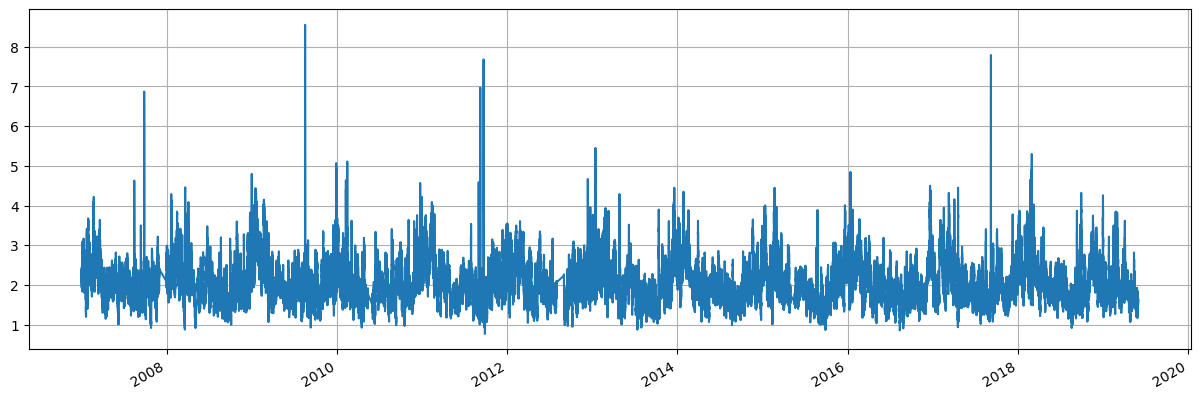

In [10]:
df=df[['WVHT','DPD']]  # Hm0 and Tp
# remove small  Hm0
df=df[df['WVHT']>0.15]
# plot Hm0 to check
df['WVHT'].plot(figsize=(15,5),grid=True)